In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler , LabelEncoder
from scipy import stats
import warnings
import keras
import random
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import (roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


# 1.0 Business Understanding

## 1.1 Business Background
Meybank, the largest financial institution in Malaysia that started in 1970. It provides different types of financial and banking services to the public which include deposit and investment, loan financing, wealth management, banking and so on. Due to an intense competition among the financial institutions or banks, Meybank has provided a broad range of products and services to attract the customers. During the marketing of those services and products, Meybank has spent a huge amount of money. 

Therefore, Meybank is constantly organizing the marketing campaign to promote its term deposit plans to the public. This is because term deposits are important for banks, as the banks will use the fund from the term deposit to make loans and invest money in other financial products that will bring a higher rate of return. With this, the return from the investments will be higher than the interest paid for the term deposit and this is considered one of the main sources of income for the banks. In order to facilitate the sales and marketing on the term deposit plans, Meybank is planning to collaborate with a group of data scientists to integrate the knowledge of business and data mining. With this collaboration, a business intelligence system will be developed to predict the potential customers that will subscribe to the term deposit plans.

### Business Objectives

1. Classify and determine the target customer that has the high possibility of subscribing to the term deposit plans. 

2. Increase the successful subscription rate among the target customers to the term deposit plan. 





## 1.2 Business Analysis
### Inventory of Resources
Personnel Resource: 



*   Data Warehouse Administrator:

  Manage and retrieve data related to the term deposit in Meybank.
*   Business Analyst:

  Experienced in the finance field and can give advice about domain knowledge to the project team. Besides, they help the project team to analyze the business process and extract the usable data that is suitable for analytical modeling.
*   Legal Expert:

  Provide legal advice to the project team about the regulation of confidential data used in the analytical model.
*   Data Analysts:

  The project team that applies data mining techniques to carry out actual data analysis. Present the finding of analytical modeling in the readable form to the related stakeholders.

Data:

*   Historical business data of Meybank from the warehouse.

Computing Resource:

*   Z170 motherboard
*   Intel Core i7-6770HQ processor
*   8GB RAM
*   128GB SSD storage
*   GTX 1080 Ti GPU (Gokkulnath, 2017)

Software: 
*   Python 
*   SQL 
*   Julia
*   Tableau
*   Excel
*   PSPP












### Requirements, Assumptions, Constraints
Requirements

*   The project shall be able to complete within 4 months.
*   The confidential data of customers such as address, NRIC, phone number shall not be disclosed to third parties.
*   A thorough descriptive data analysis shall be carried out to study the relationship between the data.
*   The data pre-processing shall be performed to improve the quality of data used.
*   The outlier, missing value and inconsistent data shall be removed during the data analysis stage.
*   The result of prediction shall be more than 90% of accuracy.
*   The built model shall be able to integrate with the banking deposit system.
*   The built model shall be applicable in the real world environment.


Assumptions

*   The budget given by Meybank to complete the project is RM100,000.
*   The sample chosen in the data sampling represents the true population of the term depositors.
*   The data used for the analytical modeling is the unbiased data. 
*   The collected data is related to the term deposit analytic project.
*   The historical data are always practical and applicable to the latest business environment.
*   The attributes found in the extracted data are highly dependent on each other.


Constraints

*   The confidential data of customers should not be included in the analytical modeling project. 
*   There are software constraints in this analytical modeling project as only open source softwares will be used.
*   The time constraints for this project is only 4 months, the project team needs to complete the data analytical modeling within the given duration. 
*   There are only 4 data analysts allocated for this project, with only 2 data analysts possessing 10 years of data mining experience, while the rest are junior staff.

 




### Risks and Contingencies
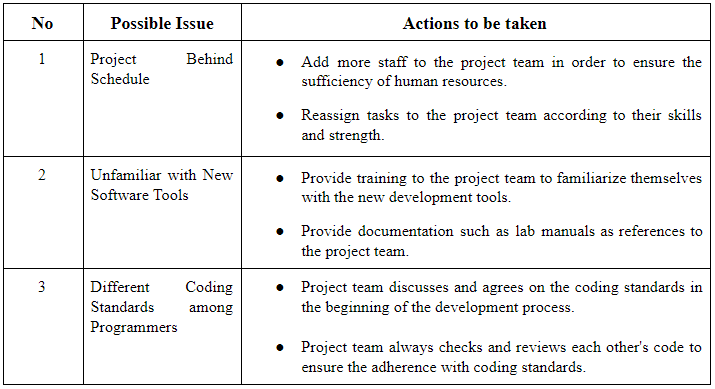



### Terminologies


1. age 
2. job : type of jobs
3. marital : marital status
4. education : educational level
5. default : has credit in default?
6. balance : average yearly balance
7. housing : has housing loan?
8. loan : has personal loan?
9. contact : contact communication type
10. day : last contact day of the month
11. month : last contact month of the year
12. duration : last contact duration in seconds
13. campaign : number of contacts performed during this campaign and for this client
14. pdays : number of days that passed by after the client was last contacted from a previous campaign
15. previous : number of contacts performed before this campaign and for this client
16. poutcome : outcome of the previous marketing campaign
17. subscribed : has the client subscribed a term deposit?



## 1.3 Data Mining Goals 
### Business Success Criteria
Based on the system prediction, the total number of actual customers that 

*   Subscribe to the term deposit plans should be more than 90%.
*   The increase of the successful subscription rate among the target customers to the term deposit plan should be more than 50%. 

### Data Mining Success Criteria

*   The accuracy of the prediction result should be more than 90%.



## 1.4 Project Plan
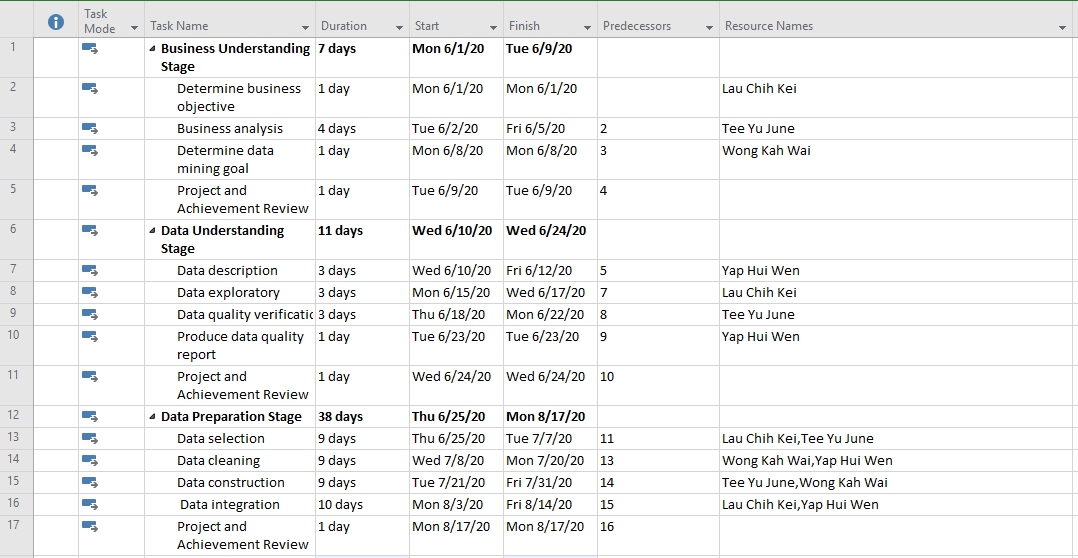


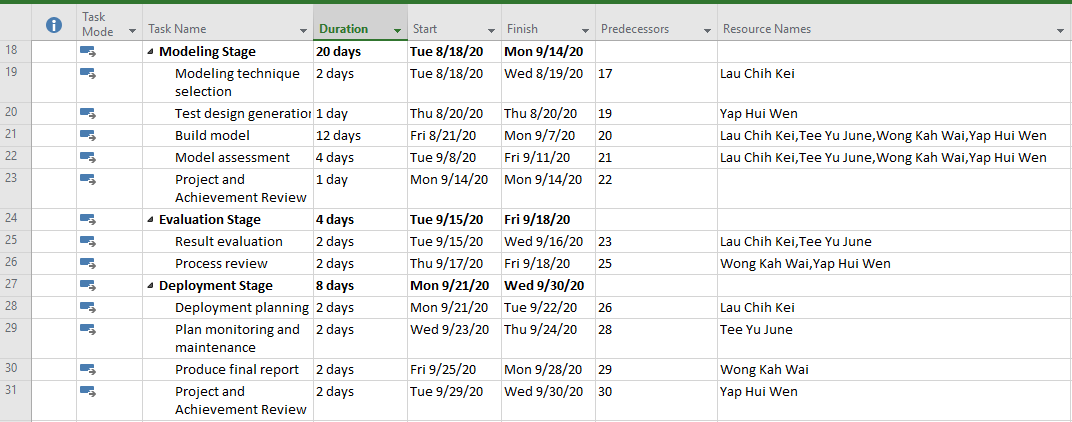

In [ ]:
'''#read train and test dataset
df = pd.read_csv("/content/drive/Shared drives/Data Science/train.csv")

#drop id column
df = df.drop(['ID'],axis=1)

X  = df.iloc[:,:-1] #drop the last column
y = df.iloc[:,-1] #choose the last column

Xtrain , Xtest , ytrain , ytest  = train_test_split(X,y,test_size=0.2, random_state=2)

print('There are {} samples in the training set and {} samples in the test set.'.format(
Xtrain.shape[0] , Xtest.shape[0]))
print()'''

# 2.0 Data Understanding

In [ ]:
#read train and test dataset
df1 = pd.read_csv("../input/datasetfolders/train.csv")

#drop id column in order to prevent data leakage
df1 = df1.drop(['ID'],axis=1)

df2 = pd.read_csv("../input/datasetfolders/bank.csv" , sep=';' , engine='python')
df2.rename(columns={'y': 'subscribed'} , inplace = True)

#concat 2 datsets
X = pd.concat([df1,df2], ignore_index=False)
X = X.drop_duplicates()
X.head()

no_sub = X[X['subscribed'] == 'no'].index

count = 0;
sampling = []
for x in no_sub:
  if(count % 2 == 0):
    sampling.append(x)
  count = count + 1

X.drop(sampling,inplace=True)

no_sub = X[X['subscribed'] == 'no'].index

count = 0;
sampling = []
for x in no_sub:
  if(count % 2 == 0):
    sampling.append(x)
  count = count + 1

X.drop(sampling,inplace=True)

print(X['subscribed'].value_counts())

train , test = train_test_split(X,test_size=0.2, random_state=6)

#train dataset
Xtrain = train.iloc[:,:-1] #drop the last column
ytrain = train.iloc[:,-1] #choose the last column

#test dataset
Xtest = test.iloc[:,:-1] #drop the last column
ytest = test.iloc[:,-1] #choose the last column

print('There are {} samples in the training set and {} samples in the test set.'.format(
Xtrain.shape[0] , Xtest.shape[0]))
print()

The table below shows the first 5 rows of the train dataset. Based on the table, we can briefly understand the datatype of the columns such as categorical and numerical values.

In [ ]:
Xtrain.head()

The datatype of the columns can be further studied by using info() function. 

Based on the displayed result, the datatype of job, marital, education, default, housing, loan, contact, month, poutcome are object, they can be considered as categorical variables.

Besides, the datatype of age, balance, day, duration, campaign, pdays, previous are int64, it means that they are numerical variables.

In [ ]:
#to identify numerical and categorical data
Xtrain.info()

From the graph below, it seems like nothing highly correlated as most of the values is below 0.5. 1 means is correlated while 0 means no correlation. 

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(Xtrain.corr(),annot = True)

## 2.1 Exploring Numerical Columns


### Data Aggregation
The table belows shows the data aggregation of each numerical column which can brings insight about the data. As we observe through the table, there is no any missing values among the columns as the number of count for each column is the same which is 8915. Besides, in the 'previous' column, noted there are 0 values in minimumn, 25%, 50% row while there is a value of 58 in the max row. However, in the 'previous' column, 0 is meaningful which indicates no contact before the campagin. Hence, 0 in the 'previous' column is the valid value but not the missing values or invalid values. 

In [ ]:
# desciptive analysis for numerical columns
Xtrain.describe()

### Data Distribution Visualization
Graph Age: The majority customers' age are between 20 to 40. 

Graph Balance: The average yearly balance housing of customers are between 0 to 10000.

Graph Campaign: The average number of contacts performed by the customers during the campaign is between 1 to 20.

Graph Day: The last contact day of the month performed by the customers was mostly between 10 to 20.

Graph Duration: The last contact duration of the customers are averagely between 0 to 2000 seconds. 

Graph Pdays: The number of days passed by after the customers were last contacted from previous campaign are mostly between 0 to 100 days.

Graph Previous: The number of contacts performed by each customers before the campaign are mostly between 0 to 10. 

In [ ]:
#visualize the data distribution of numerical data

Xtrain[['age','balance','day','duration','campaign','pdays','previous']].hist(bins=15, figsize=(15, 6), layout=(2, 4));

In [ ]:
def bivariate_distribution(title):
  train = pd.concat([Xtrain,ytrain],axis=1)

  sns.FacetGrid(train,hue='subscribed' ,size=5 ).map(sns.distplot,title).add_legend()



The graph indicates a normal distribution of "yes" and "no" on subscriptions for age column which shows that the highest is 30 years old for both decisions.

Besides that, the "no" on subscriptions are linearly decreases after the 60 years old and remain constant after 70 years old.

Overall, the distribution of "yes" on subscriptions are lower than the distribution of "no" on subscriptions. 

In [ ]:
bivariate_distribution('age')

According to the graph shown below, the average yearly balance housing for both subscribed customers and not subscribe customers are in between of 0 to 10000.

In [ ]:
bivariate_distribution('balance')

According to the graph below, the average number of contacts performed by subscribed and not subscribe customers are mostly in between of 0 to 10.  

In [ ]:
bivariate_distribution('campaign')

The graph indicates a distribution of "yes" and "no" on subscriptions for day column which shows that the highest is 18th for both decisions.

Besides that, the "no" on subscriptions are instantly decreases after 20th and 28th.

Overall, the distribution of "yes" on subscriptions are lower than the distribution of "no" on subscriptions.

In [ ]:
bivariate_distribution('day')

According to graph below, the last contact duration of not subscribe customers are mostly between 0 to 1000 seconds while for subscribed customers, the last contact duration is between 0 to 2000 seconds. 

In [ ]:
bivariate_distribution('duration')

The graph indicates a normal distribution of "yes" on subscriptions which shows that the highest is 0 day.

Besides that, there is a flat distribution of "no" on subscriptions because people who do not subscribe will not contact the clients.

Overall, the distribution of "yes" on subscriptions determined that the highest passed day after the last contacted to clients is 0.

In [ ]:
bivariate_distribution('pdays')

According to the graph shown below, the number of contacts performed by subscribed and not subscribe customers are mostly in between of 0 to 10. 

In [ ]:
bivariate_distribution('previous')

## 2.2 Explore Categorical Columns

In [ ]:
def explore_categorical_column(title):
  train = pd.concat([Xtrain,ytrain],axis=1)

  sns.catplot(x=title,kind='count', hue="subscribed", palette='pastel', data=train)

The subscribed and not subscribe customers will be categorized according to their job. According to the graph below, the highest number of customers who do not subscribe the term deposit are from 'blue-collar' job (1274) followed by management job (1122).

While for subscribed customers, the highest number of job is management followed by technician (505). 

In [ ]:
explore_categorical_column("job")

job_train = pd.crosstab(Xtrain.job,ytrain)
print(job_train)

According to the graph below, most of the customers (3398) who has married will not subscribe the term deposit plan. On the other hand, the number of the customers who is married status that subscribed the term depost also is the highest (1730) compared to single customers (1204) and divorced customers (380).

In [ ]:
explore_categorical_column("marital")

marital_train = pd.crosstab(Xtrain.marital,ytrain)
print(marital_train)

The customers are then categorized according to their presence of credit in default. According to the graph, most of the customers (8785) do not have credit in default. 5504 of them are not subscribing the term deposit while 3281 of them have subscribed the term deposit.

In [ ]:
explore_categorical_column("default")

default_train = pd.crosstab(Xtrain.default,ytrain)
print(default_train)

The subscribed and not subscribe customers will be categorized according to their housing loan. 

According to the graph below, 2127 of customers that do not have housing loan are the person will subscribe the term deposit which are higher than customers that have housing loan (1187)

In [ ]:
explore_categorical_column("housing")

housing_train = pd.crosstab(Xtrain.housing,ytrain)
print(housing_train)

The customers are categorized according to the presence of personal loan. According to the graph, based on the customer that have subscribed the term deposit, most of the customers (3045) do not have housing loan. Only 269 customers have housing loan.

In [ ]:
explore_categorical_column("loan")

loan_train = pd.crosstab(Xtrain.loan,ytrain)
print(loan_train)

The customers are then categorized according to their contact communication type. According to the graph, the communication type will be classified into 3 types, which are telephone, cellular contact and unknown. From the total number of customers who subcribed the term deposit (3314), 2783 of customers who use cellular have subscribed the term deposit. While 236 and 295 customers use telephone and unknown communication gadget.

In [ ]:
explore_categorical_column("contact")

contact_train = pd.crosstab(Xtrain.contact,ytrain)
print(contact_train)

The subscribed and not subscribe customers will be categorized according to their last contact month of the year. 

According to the graph below, the highest number of subscribed customers is from May of the year followed by August.

In [ ]:
explore_categorical_column("month")

month_train = pd.crosstab(Xtrain.month,ytrain)
print(month_train)

The subscribed and not subscribe customers will be categorized according to their outcome of the previous marketing campaign which are failure, success, unknown and other. 

According to the graph below, from the 3314 customers who subscribed the term deposit, 2041 of customers are from the "unknown" category which is the highest number followed by "success" category (663) 

In [ ]:
explore_categorical_column("poutcome")

poutcome_train = pd.crosstab(Xtrain.poutcome,ytrain)
print(poutcome_train)

Chi-Square Test

Chi-Square Test is carried out to investigate the dependency between the both categorical x and  y.

Based on the results below, the attribute job, marital, eudcation, defualt, housing, loan, contact, month and poutcome are dependent to subscribed

In [ ]:
job_train = pd.crosstab(Xtrain.job,ytrain)
marital_train = pd.crosstab(Xtrain.marital,ytrain)
edu_train = pd.crosstab(Xtrain.education,ytrain)
default_train = pd.crosstab(Xtrain.default,ytrain)
house_train = pd.crosstab(Xtrain.housing,ytrain)
loan_train = pd.crosstab(Xtrain.loan,ytrain)
contact_train = pd.crosstab(Xtrain.contact,ytrain)
month_train = pd.crosstab(Xtrain.month,ytrain)
poutcome_train = pd.crosstab(Xtrain.poutcome,ytrain)

#returns four values, 𝜒2 value, p-value, degree of freedom and expected values.

a = [job_train,marital_train,edu_train,default_train,house_train,loan_train,contact_train,month_train,poutcome_train]

print("P values of every column")
n=1
for x in a:
  
  chi, pval, dof, exp = chi2_contingency(x)
  significance = 0.05
  print(n,'. -------------------------------',x.index.name,'---------------------------------')

  print('p-value=%.6f, significance=%.2f\n' % (pval, significance))
  if pval < significance:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
  They are not independent.""" % (significance))
  else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
  They are independent.""" % (significance))
    
  #print(x.index.name," = " ,chi2_contingency(x)[1]) # print p values

  print('  --------------------------------------------------------------------------------\n\n')
  n+=1

# 3.0 Data Preparation 

## 3.1 Encode Variables

The sklearn LabelEncoder function is utilized to encode the categorical variables such as job, marital, education, contact, poutcome, default, housing, loan, subscribed and month.

In [ ]:
def column_encoding(df_x , df_y):

  df = pd.concat([df_x,df_y],axis=1)
  
  label_encoder = preprocessing.LabelEncoder()

  nominal_cols = ['job', 'marital','education' , 'contact', 'poutcome']
  for name in nominal_cols:
    df[name] = label_encoder.fit_transform(df[name])
    df[name].value_counts()

  #encoding 'default' , 'housing', 'loan' attributes 
  # 1 is yes , 0 is no
  mapping_dictionary = {"default" :{"yes" : 1 , "no" : 0},
                      "housing"  :{"yes" : 1 , "no" : 0},
                      "loan" :{"yes" : 1 , "no" : 0} ,
                      "subscribed" : {"yes" : 1 , "no" : 0}}

  df = df.replace(mapping_dictionary)

  #month
  replace_dictionary = { "month" : {"jan" : 1 , 
                                  "feb" : 2,
                                  "mar" : 3,
                                  "apr" : 4,
                                  "may" : 5,
                                  "jun" : 6,
                                  "jul" : 7,
                                  "aug" : 8,
                                  "sep" : 9,
                                  "oct" : 10,
                                  "nov" : 11,
                                  "dec" : 12}}

  df.replace(replace_dictionary , inplace=True)

  df_y = df.subscribed
  df_x = df.drop('subscribed', axis=1)
  return df_x , df_y


The train and test dataset are encoded separately

In [ ]:
Xtrain , ytrain = column_encoding(Xtrain , ytrain)
Xtest , ytest = column_encoding(Xtest , ytest)

After performing label encoding operation for both train and test datasets, the categorical values are converted to numerical values. 

In [ ]:
Xtrain.head()

## 3.2 Data Cleaning (for train dataset)

### Missing Values

From the result shown in below, there is no any missing values as the number of null values in each column is 0.

In [ ]:
#handle missing value
null_counts = Xtrain.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

#conclusion : no missing value

### Duplicated Values

From the result shown below, there is no duplicated data as the data size is the same.









In [ ]:
# Detect duplicate data
Xtrain_dedupped = Xtrain.drop_duplicates()

print(Xtrain.shape)
print(Xtrain_dedupped.shape)

### Remove Outliers

The method used to remove the outliers is called Z-score. In this particular case, a threshold of 3 is used and if the Z-score value is greater than 3, that data point will be identified as outliers. From the table below, there are a total of 7989 rows that have the Z-score which is lower than the threshold value which is 3. Hence, all the selected rows will be used in the following step.

In [ ]:
#remove outliers

from scipy import stats

X = pd.concat([Xtrain,ytrain],axis=1)

X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]

Xtrain = X.iloc[:,:-1] #drop the last column
ytrain = X.iloc[:,-1] #choose the last column
print(X)
print(X.shape)

The code below is is used to split the Xtrain into 2 different categories which one consists of categorical data while the other consists of numerical data. 

In [ ]:
categorical_var_train = Xtrain[['contact','education','default','housing','loan','job','poutcome','marital',
                         'month']]

numerical_var_train = Xtrain.drop(['contact','education','default','housing','loan','job','poutcome','marital',
                         'month'],axis=1)    

categorical_var_test = Xtest[['contact','education','default','housing','loan','job','poutcome','marital',
                         'month']]

numerical_var_test = Xtest.drop(['contact','education','default','housing','loan','job','poutcome','marital',
                         'month'],axis=1)    
        

Since there are numerical data (continuous) in the table, StandardScaler was used to scales each input variable separately by subtracting the mean and dividing by the standard deviation in order to have a distribution of mean of zero and a standard deviation of one.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_Xtrain = scaler.fit_transform(numerical_var_train)
scaled_Xtest = scaler.transform(numerical_var_test)

After the continuous data was scaled, it is then concate back with the categorical dataframe for later model prediction.

In [ ]:
scaled_Xtrain = pd.DataFrame(scaled_Xtrain)
scaled_Xtrain = scaled_Xtrain.reset_index() 
categorical_var_train =  categorical_var_train.reset_index() 

scaled_Xtest = pd.DataFrame(scaled_Xtest)
scaled_Xtest = scaled_Xtest.reset_index() 
categorical_var_test = categorical_var_test.reset_index() 

In [ ]:
Xtrain = pd.concat([scaled_Xtrain,categorical_var_train],axis=1)
Xtrain = Xtrain.drop(['index','index'],axis=1)   

Xtest = pd.concat([scaled_Xtest,categorical_var_test],axis=1)
Xtest = Xtest.drop(['index','index'],axis=1)   

Xtrain.head(-20)


# 4.0 Modeling


## 4.1 Naive Bayes
Naive Bayes is a simple "probabilistic classifiers" which based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (X) and it is useful for very large dataset. In this section, GaussionNB was imported from sklearn and Xtrain, ytrain were bring fitted into the model in order to do prediction.

In [ ]:
from sklearn.naive_bayes import GaussianNB       # 1. choose model class
naive_model = GaussianNB()                       # 2. instantiate model
 

Fit the training sets to the model.

In [ ]:
naive_model.fit(Xtrain, ytrain)                  # 3. fit model to data

Predict the testing sets.

In [ ]:
y_naive_model_model = naive_model.predict(Xtest) 

The accuracy score of the Gaussian Naive Bayes is 76.22% which is consider acceptable.

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score(ytest, y_naive_model_model)
print(f"Accuracy : {accuracy_score(ytest, y_naive_model_model)*100} %" )

In [ ]:
#plt.scatter(Xtrain.iloc[:, 0], Xtrain.iloc[:, 1], c=ytrain, s=50, cmap='RdBu')
#lim = plt.axis()
#plt.scatter(Xtest.iloc[:, 0], Xtest.iloc[:, 1], c=ytest, s=20, cmap='RdBu', alpha=0.1)
#plt.axis(lim);

## 4.2 K-Nearest Neighbours (KNN)
KNN is an algorithm which it is non-parametric and lazy (instance based) because it doesn't have a specialized training phase.
In this section, the grid search algorithm was used to find the best parameters for the k values in order to have the best accuracy. In this case, k value of 14 provides the highest accuracy score.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def grid_search_knn():

  #Grid Search to find the best parameters
  k_range = list(range(1,31))
  weight_options = ["uniform", "distance"]
  param_grid = dict(n_neighbors = k_range, weights = weight_options)

  knn = KNeighborsClassifier()
  grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
  grid.fit(Xtrain,ytrain)

  #print(grid.grid_scores_)
  '''
  print(grid.grid_scores_[0].parameters)
  print(grid.grid_scores_[0].cv_validation_scores)
  print(grid.grid_scores_[0].mean_validation_score)
  '''

  print (grid.best_score_)
  print (grid.best_params_)
  print (grid.best_estimator_)

grid_search_knn()


Fit the training sets to the model.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 14)

knn.fit(Xtrain, ytrain)


Predict the testing sets.

In [ ]:
knn_model = knn.predict(Xtest)  

The accuracy score for KNN model is 79.45% which is consider acceptable.

In [ ]:
#knn.score(scaled_Xtest, ytest)
#accuracy_score(ytest, knn_model)
print(f"Accuracy : {accuracy_score(ytest, knn_model)*100} %" )

## 4.3 Decision Tree

Randomized search is carried out to find the optimal hyperparameter value for decision tree model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def randomize_search_decision_tree():

  X_train , X_test , y_train , y_test = Xtrain , Xtest , ytrain , ytest

  max_depth = list(range(1, 50))
  min_samples_leaf = list(range(1, 60))
  min_samples_split = list(range(2,50))
  max_features = list(range(1, X_train.shape[1]))
  criterion = ['entropy' , 'gini']


  decision_tree_model = DecisionTreeClassifier()

  #carry out randomized search
  parameter_grid = dict(criterion=criterion,
                      max_features=max_features,
                      min_samples_leaf=min_samples_leaf,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split)

  grid = RandomizedSearchCV(estimator=decision_tree_model, param_distributions=parameter_grid)
  grid.fit(X_train,y_train)

  print("Best criterion ：" , grid.best_estimator_.criterion)
  print("Best max_features" , grid.best_estimator_.max_features)
  print("Best min_samples_leaf : " , grid.best_estimator_.min_samples_leaf)
  print("Best max_depth : " , grid.best_estimator_.max_depth )
  print("Best min_samples_split : " , grid.best_estimator_.min_samples_split)

The result of randomized search is applied to the decision tree model

In [ ]:
criterion = "gini"
max_features = 10
min_samples_leaf = 41
max_depth = 35
min_samples_split = 41

In [ ]:
#result of randomized search

X_train , X_test , y_train , y_test = Xtrain , Xtest , ytrain , ytest

decision_tree_model = DecisionTreeClassifier(criterion=criterion,
                      max_features=max_features,
                      min_samples_leaf=min_samples_leaf,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split,
                      random_state = 50
                      )
decision_tree_model.fit(X_train, y_train)    

# Predicton on test dataset
y_pred_decision_tree = decision_tree_model.predict(X_test) 

print(f"Accuracy : {decision_tree_model.score(X_test,y_test)*100} %" )

## 4.4 Random Forest

Carried out randomized search to find the optimal hyperparameter value for random forest model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def randomize_search_random_forest():

  X_train , X_test , y_train , y_test = Xtrain , Xtest , ytrain , ytest

  n_estimators = [100,200,300,400,500,600,700,800,900]
  max_features = ['auto', 'sqrt']
  max_depth = [10,20,30,40,50,60,70,80,90,100]
  min_samples_split = [10,20,30,40,50]
  min_samples_leaf = [10,20,30,40,50]
  bootstrap = [True, False]
  max_leaf_nodes = [2,4,6,8,10,20,30,40,50]

  random_forest_model = RandomForestClassifier()

  #carry out randomized search
  parameter_grid = dict(n_estimators=n_estimators,
                      max_features=max_features,
                      min_samples_leaf=min_samples_leaf,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split,
                      bootstrap=bootstrap,
                      max_leaf_nodes=max_leaf_nodes)

  grid = RandomizedSearchCV(estimator=random_forest_model, param_distributions=parameter_grid)
  grid.fit(X_train,y_train)

  #print hyperparatmeter values
  print("Best n_estimators : " , grid.best_estimator_.n_estimators)
  print("Best max_features : " , grid.best_estimator_.max_features)
  print("Best min_samples_leaf : " , grid.best_estimator_.min_samples_leaf)
  print("Best max_depth : " , grid.best_estimator_.max_depth)
  print("Best min_samples_split : " , grid.best_estimator_.min_samples_split)
  print("Best bootstrap : " , grid.best_estimator_.bootstrap)
  print("Best max_leaf_nodes : " , grid.best_estimator_.max_leaf_nodes)

randomize_search_random_forest()

The optimal hyperparameter values are shown below. The will be applied to the random forest model.

In [ ]:
n_estimators = 500
max_features = "auto"
min_samples_leaf = 30
max_depth = 30
min_samples_split = 40
bootstrap = "True"
max_leaf_nodes = 50

Performing training for the random forest model

In [ ]:
#result of randomized search
random_forest_model = RandomForestClassifier(n_estimators=n_estimators ,
                      max_features=max_features ,
                      min_samples_leaf=min_samples_leaf,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split ,
                      bootstrap=bootstrap,
                      max_leaf_nodes=max_leaf_nodes,
                      random_state = 50)
random_forest_model.fit(X_train, y_train)   

# Predicton on test with giniIndex 
y_pred_random_forest = random_forest_model.predict(X_test) 

print(f"Accuracy : {random_forest_model.score(X_test,y_test)*100} %" )


## 4.5 Logistic Regression

For Logistic Regression, a logistic regression classifier is implemented. Hyperparameters are tuned using GridSearchCV and model is then fit to training data. 

In [ ]:
# Instantiate classifier
logistic_regression = LogisticRegression(random_state = 30)

# Set up hyperparameter grid for tuning
logistic_regression_param_grid = {'C' : [0.0001, 0.001, 0.01, 0.05, 0.1] }

# Tune hyperparameters
logistic_regression_model = GridSearchCV(logistic_regression, param_grid = logistic_regression_param_grid, cv = 5)

# Fit model to training data
logistic_regression_model.fit(Xtrain, ytrain)

Predict the test set results and calculate the accuracy. 

In [ ]:
# Predict test data on logistic regression
print(f"Accuracy : {logistic_regression_model.score(Xtest, ytest)*100} %" )

# Obtain model performance metrics
lr_pred_prob = logistic_regression_model.predict_proba(Xtest)[:,1]
lr_auroc = roc_auc_score(ytest, lr_pred_prob) 

## 4.6 Artificial Neural Network (ANN)

The ANN architecture is set up with 2 hidden layers (9 neurons, ReLU activation) and output layer (1 neuron, Sigmoid activation).

In [ ]:
# Create an object of sequential model
ann_classifier = Sequential()
# Add the first hidden layer
ann_classifier.add(Dense(9, activation = 'relu', input_dim = 16))
# Adding the second hidden layer
ann_classifier.add(Dense(9, activation= 'relu'))
# Adding the output layer
ann_classifier.add(Dense(1, activation = 'sigmoid'))

Configure the model and train it over 100 epochs.

In [ ]:
ann_classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Model is trained over 100 epochs
ann_model = ann_classifier.fit(Xtrain, ytrain, validation_split = 0.33, batch_size = 10, epochs= 100)

Predict the test set and calculate the ANN model score. 

In [ ]:
# Predict probabilities for test set
ann_y_predict = ann_classifier.predict(Xtest)
# Predict crisp classes for test set
ann_y_classes = ann_classifier.predict_classes(Xtest)
# Reduce to 1d array
ann_y_classes = ann_y_classes[:, 0]
# Model score calculation
ann_score = accuracy_score(ann_y_predict.astype('int'), ytest.astype('int'))
print(f"Accuracy : {ann_score*100} %" )

## 4.7 Gradient Boosting Classification


The gradient boosting classifier is implemented to carry out gradient boosting classification. The best learning rate was selected by setting different rate to achieve the best performance.

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

# Scalling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(Xtrain)
X_test = scaler.transform(Xtest)

# Set different learning rates to retrieve the best rate on performance
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(Xtrain, ytrain)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(Xtrain, ytrain)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(Xtest, ytest)))

The learning rate, 1 was selected as a parameter of the gradient boosting model created. After that, the Xtrain and ytrain dataset were fit into the model created and make prediction on Xtest dataset. 

In [ ]:
# The best learning rate was 0.5 to fit into the classifier
gradient_boosting_model = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gradient_boosting_model.fit(Xtrain, ytrain)
y_pred_gradient_boosting = gradient_boosting_model.predict(Xtest)
gbScore = gradient_boosting_model.score(Xtest, ytest)
gbMatrix = confusion_matrix(ytest, y_pred_gradient_boosting)

# Output of accuracy
print(f"Accuracy : {gbScore*100} %")

## 4.8 Support Vector Machine (SVM)

A linear SVM was chosen by using the SVC classifier to make prediction on Xtest dataset by fitting the Xtrain and ytrain datasets into the SVM model. Accuracy was calculated and displyed by using score syntax.

In [ ]:
# Import necessary library
from sklearn.svm import SVC

# Create a linear SVM classifier
svm_model = SVC(kernel='linear', probability=True)

# Train classfier
svm_model.fit(Xtrain, ytrain)

# Take the model that was trained on the Xtrain data and apply it to the Xtest
y_pred_svm = svm_model.predict(Xtest)

# Calculation of accuracy
svmScore = svm_model.score(Xtest, ytest)

# Calculation of confusion matrix
svmMatrix = confusion_matrix(ytest, y_pred_svm)

# Print output
print(f"Accuracy : {svmScore*100} %")

# 5.0 Evaluation
The evaluation mathod used involving confusion metrix, precision-recall curve and also learning curve.

## 5.1 Learning Curve
Learning curves are plots that show changes in learning performance over time  and it can be used to diagnose an underfit, overfit, or well-fit model based on the train and validation datasets.

The section below shows the learning curve, scalability and performance of different models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


As we observed from the learning curve of Naive Bayes, the training score decreased in the beginning and then flat after 2000th training examples while the validation score increase until 2000th training examples and flat after that. Hence, it is a well fit model.

Besides, as we can see from the second graph (Scalability of the model), Naive Bayes requires more time to train when the training datasets increase. 

From the third graph (Performance of the model), Naive Bayes model have a greater score when fit times increased.

In [ ]:

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(naive_model, title, Xtrain, ytrain,ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

As we observed from the learning curve of KNN, the training score gradually increase to the end while the validation score also the same but it has a score lower then training score. Hence, it is a well fit model.

Besides, as we can see from the second graph (Scalability of the model), KNN requires more time to train when the training datasets increase. 

From the third graph (Performance of the model), KNN model have a greater score when fit times increased.

In [ ]:
title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier()
plot_learning_curve(knn, title, Xtrain, ytrain,ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)



plt.show()

According to the learning curve of decision tree, the training score and cross-validation score are not very good at beginning. However, the both scores show a slightly enhancement at the end. When comparing the training score with cross-validation score, the cross-validation score is lower than the training score, which means that there is overfitting in the model.

While the scalability graph illustrates the times required by the decision tree model to train with various sizes training dataset.

Based on the third graph, the model acheives a good score (81%）when fit times increase.

In [ ]:
title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(decision_tree_model, title, Xtrain, ytrain,  ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

According to the learning curve of random forest, the training score and cross-validation score are not very good at beginning. However, the both scores show a gradual enhancement at the end. When comparing the training score with cross-validation score, the cross-validation score is lower than the training score, which means that the model is overfitting

While the scalability graph illustrates the times required by the decision tree model to train with various sizes training dataset.

Based on the third graph, the model acheives a good score (83%）when fit times increase.

In [ ]:
title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(random_forest_model, title, Xtrain, ytrain,  ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

According to the learning curve of logistic regression, the training score and cross-validation score are slighty different at the beginning. However, the both scores are then come to 0.80 at the end of model training. 

While the next two graphs illustrate the time required for logistic regression to train on the different size of training dataset and its performance during model training.

In [ ]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = LogisticRegression(random_state = 30)
plot_learning_curve(logistic_regression_model, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

Graphs below are used to visualise the accuracy and loss of ANN model. According to the Model Accuracy graph, the overall accuracy of training set and test set are improved at the end. 

While for Model Loss graph, the overall loss generated from training and test data are reduced to be less than 0.40 at last. 

In [ ]:
#Accuracy and Loss Curves of ANN Model 
#Accuracy vs Value Accuracy
ann_model.history.keys()
# summarize history for accuracy
plt.plot(ann_model.history['accuracy'])
plt.plot(ann_model.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('EPOCH')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()

#loss vs value loss
plt.plot(ann_model.history['loss'])
plt.plot(ann_model.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

According to the learning curves of gradient boosting, the training score and cross-validation score are totally different before 2000 training samples. However, both scores are gradually enhance at the end. By comparing the training score and cross-validation score, both scores are parallel which means that the model is well fit.


The scalability and performace graphs determined the times required by the gradient boosting model to train on the various size of training dataset and the model achieves a good score (81.3%) when fit times increase.

In [ ]:
title = "Learning Curves (Gradient Boosting)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GradientBoostingClassifier()
plot_learning_curve(gradient_boosting_model, title, Xtrain, ytrain,  ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

According to the learning curves of linear SVM, the training score and cross-validation score are almost parallel before 3500 training samples. At the end, both scores are gradually enhance. By comparing the training score and cross-validation score, both scores are parallel which means that the model is well fit.

The scalability and performace graphs determined the times required by the gradient boosting model to train on the various size of training dataset and the model achieves a moderate score (79.6%) when fit times increase.

In [ ]:
title = "Learning Curves (Linear SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(svm_model, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

## 5.2 Model Evaluation


In [ ]:
def model_evaluation(model,name):

  confusion_matrix = pd.crosstab(ytest, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
  sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel('Prediction label')
  plt.ylabel('True Label');
  plt.title(name)
  plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
  plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
  plt.show()

  target_names = ['No' , 'Yes']
  
  print ('Precision:', precision_score(ytest, model,pos_label=1))
  print ('Accuracy:', accuracy_score(ytest, model))
  print ('F1 score:', f1_score(ytest, model,pos_label=1))
  print ('Recall:', recall_score(ytest, model,pos_label=1))
  print ('\n clasification report:\n', classification_report(ytest,model,target_names=target_names))

### KNN
When the KNN predicts a number of 662 (527+135, True Positive + False Positive) subscribed , only 527(True Positive) of which were actual subscribed, while failing to return 323 additional actual subscribed (False Negative), its precision is 527/662 = 0.7961 (TP/TP+FP) while its recall is 527/323+527 = 0.62 (TP/TP+FN). In other words, when the model predicts the customer term deposit subscription, 135 customers are predicted as they will subscribe the term deposit, but actually they are not subscribing. On the other side, 527 customers are predicted correctly by the model.

While evaluating the model from the accuracy perspective, the result is sligtly lower than its precision which is 79.45%. It means that out of 2229 customers,  1244 of customers will not subscribe the term deposit which are predicted correctly by the model. Besides, 527 of customers will subscribe the term deposit which are predicted correctly.

In [ ]:
model_evaluation(knn_model,"KNN")

### Naive Bayes
When the Naive Bayes predicts a number of 894 (607+287, True Positive + False Positive) subscribed , only 607(True Positive) of which were actual subscribed, while failing to return 243 additional actual subscribed (False Negative), its precision is 607/894 = 0.6789 (TP/TP+FP) while its recall is 607/243+607 = 0.7141 (TP/TP+FN). In other words, when the model predicts the customer term deposit subscription, 287 customers are predicted as they will subscribe the term deposit, but actually they are not subscribing. On the other side, 607 customers are predicted correctly by the model.

While evaluating the model from the accuracy perspective, the result is higher than its precision which is 76.22%. It means that out of 2229 customers,  1092 of customers will not subscribe the term deposit which are predicted correctly by the model. Besides, 607 of customers will subscribe the term deposit which are predicted correctly.

In [ ]:
model_evaluation(y_naive_model_model,"Naive Bayes")

### Decision Tree

When the Decision tree predicts a number of 848 (662+186, True Positive + False Positive) subscribed , only 662(True Positive) of which were actual subscribed, while failing to return 188 additional actual subscribed (False Negative), its precision is 662/848 = 0.7807 (TP/TP+FP) while its recall is 662/662+188 = 0.7788 (TP/TP+FN). In other words, when the model predicts the customer term deposit subscription, 186 customers are predicted as they will subscribe the term deposit, but actually they are not subscribing. On the other side, 662 customers are predicted correctly by the model.

While evaluating the model from the accuracy perspective, the result is higher than its precision which is 83.22%. It means that out of 2229 customers,  1193 of customers will not subscribe the term deposit which are predicted correctly by the model. Besides, 662 of customers will subscribe the term deposit which are predicted correctly.


In [ ]:
model_evaluation(y_pred_decision_tree,"Decision Tree")

### Random Forest

When the Random Forest predicts a number of 835 (662+173, True Positive + False Positive) subscribed , only 662(True Positive) of which were actual subscribed,its precision is 662/835 = 0.7928 (TP/TP+FP) while its recall is 662/662+188 = 0.7788 (TP/TP+FN). In other words, when the model predicts the customer term deposit subscription, 173 customers are predicted as they will subscribe the term deposit, but actually they are not subscribing. On the other side, 662 customers are predicted correctly by the model.

While evaluating the model from the accuracy perspective, the result is higher than its precision which is 83.80%. It means that out of 2229 customers,  1206 of customers will not subscribe the term deposit which are predicted correctly by the model. Besides, 662 of customers will subscribe the term deposit which are predicted correctly.

In [ ]:
model_evaluation(y_pred_random_forest,"Random Forest")

### Logistic Regression

While Logistic Regression predict a number of 769 subscriber, only 582 which were actual subscribed. Its precision is 0.757 while recall is 0.6847. 

While for accuracy perspective, the result is higher than precision result which is 0.7568. It means than out of 2229 customers, 1192 of customers will be predicted correctly in not subscribing the term deposit and 582 of customers will be predicted correctly in subscribing the term deposit.

In [ ]:
lr_y_pred = logistic_regression_model.predict(Xtest)
model_evaluation(lr_y_pred,"Logistic Regression")

### ANN

When ANN model predicts a number of 873 (647+226, True Positive + False Positive) subscribed , only 647(True Positive) of which were actual subscribed, while failing to return 226 additional actual subscribed (False Negative), its precision is 647/873 = 0.7411 (TP/TP+FP) while its recall is 647/647+203 = 0.7612 (TP/TP+FN). In other words, when the model predicts the customer term deposit subscription, 226 customers are predicted as they will subscribe the term deposit, but actually they are not subscribing. On the other side, 647 customers are predicted correctly by the model.

While evaluating the model from the accuracy perspective, the result is higher than its precision which is 80.75%. It means that out of 2229 customers, 1153 of customers will not subscribe the term deposit which are predicted correctly by the model. Besides, 647 of customers will subscribe the term deposit which are predicted correctly.


In [ ]:
model_evaluation(ann_y_classes,"ANN")

### Gradient Boosting Classification

When the Gradient Boosting predicts a number of 768 (607+161, True Positive + False Positive) subscribed , only 607(True Positive) of which were actual subscribed, while failing to return 243 additional actual subscribed (False Negative), its precision is 607/768 = 0.7904 (TP/TP+FP) while its recall is 607/607+243 = 0.7141 (TP/TP+FN). In other words, when the model predicts the customer term deposit subscription, 161 customers are predicted as they will subscribe the term deposit, but actually they are not subscribing. On the other side, 607 customers are predicted correctly by the model.


While evaluating the model from the accuracy perspective, the result is higher than its precision which is 81.88%. It means that out of 2229 customers, 1218 of customers will not subscribe the term deposit which are predicted correctly by the model. Besides, 607 of customers will subscribe the term deposit which are predicted correctly.

In [ ]:
model_evaluation(y_pred_gradient_boosting,"Gradient Boosting")

### Linear SVM

When the linear SVM predicts a number of 779 (584+195, True Positive + False Positive) subscribed , only 584(True Positive) of which were actual subscribed, while failing to return 266 additional actual subscribed (False Negative), its precision is 584/779 = 0.7497 (TP/TP+FP) while its recall is 584/584+266 = 0.6870 (TP/TP+FN). In other words, when the model predicts the customer term deposit subscription, 195 customers are predicted as they will subscribe the term deposit, but actually they are not subscribing. On the other side, 584 customers are predicted correctly by the model.

While evaluating the model from the accuracy perspective, the result is higher than its precision which is 79.32%. It means that out of 2229 customers, 1184 of customers will not subscribe the term deposit which are predicted correctly by the model. Besides, 584 of customers will subscribe the term deposit which are predicted correctly.

In [ ]:
model_evaluation(y_pred_svm,"Linear SVM")

## 5.3 Precision-Recall Curve

Precision-Recall Curve (PRC) is a helpful evaluation method of success of prediction when the classes are not balanced. The precision-recall curve demonstrates the compromise between precision and recall for different threshold values.  Since the dataset of term deposit prediction is not balanced between subscribers and not subscribers, PRC is chosen to evaluate the models.

A high area under curve (AUC) shows both high recall and precision, where high precision indicates a low false positive rate, and high recall determines a low false negative rate. High scores for both proves that the model has achieved accurate results.

Based on the PR AUC, Random Forest (0.842) outperforms other algorithms which is followed by Decision Tree (0.815) and ANN (0.808). On the other hand, Naive Bayes, Gradient Boosting Classification and Linear SVM are the lowest (0.684). Therefore, it is concluded that Random Forest has the highest precision and recall value overall.


In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
# plot no skill and model precision-recall curves

 
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(Xtrain, ytrain)
yhat = model.predict_proba(ytest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

# decision tree model
dt_yhat = decision_tree_model.predict_proba(Xtest)
dt_model_probs = dt_yhat[:, 1]
# calculate the precision-recall auc
dt_precision, dt_recall, _ = precision_recall_curve(ytest, dt_model_probs)
dt_auc_score = auc(dt_recall, dt_precision)
print('Decision Tree PR AUC: %.3f' % dt_auc_score)

#================================================================================

#random forest model
rf_yhat = random_forest_model.predict_proba(Xtest)
rf_model_probs = rf_yhat[:, 1]
# calculate the precision-recall auc
rf_precision, rf_recall, _ = precision_recall_curve(ytest, rf_model_probs)
rf_auc_score = auc(rf_recall, rf_precision)
print('Random Forest PR AUC: %.3f' % rf_auc_score)

#================================================================================

#knn
knn_yhat = knn.predict_proba(Xtest)
knn_model_probs = knn_yhat[:, 1]
# calculate the precision-recall auc
knn_precision, knn_recall, _ = precision_recall_curve(ytest, knn_model_probs)
knn_auc_score = auc(knn_recall, knn_precision)
print('KNN PR AUC: %.3f' % knn_auc_score)

#================================================================================

#Naive Bayess
n_yhat = naive_model.predict_proba(Xtest)
n_model_probs = n_yhat[:, 1]
# calculate the precision-recall auc
n_precision, n_recall, _ = precision_recall_curve(ytest, n_model_probs)
n_auc_score = auc(n_recall, n_precision)
print('Naive Bayes PR AUC: %.3f' % n_auc_score)

#================================================================================

#Logistic Regression
lr_yhat = logistic_regression_model.predict_proba(Xtest)
lr_model_probs = lr_yhat[:,1]
# calculate the precision-recall auc
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_model_probs)
lr_auc_score = auc(lr_recall, lr_precision)
print('Logistic Regression PR AUC: %.3f' % lr_auc_score)

#================================================================================

#ANN
ann_yhat = ann_classifier.predict_proba(Xtest)
ann_model_probs = ann_yhat[:,0]
# calculate the precision-recall auc
ann_precision, ann_recall, _ = precision_recall_curve(ytest, ann_model_probs)
ann_auc_score = auc(ann_recall, ann_precision)
print('ANN PR AUC: %.3f' % ann_auc_score)

#================================================================================

# Gradient Boosting Classification
gb_yhat = gradient_boosting_model.predict_proba(Xtest)
gb_model_probs = n_yhat[:, 1]
# calculate the precision-recall auc
n_precision, n_recall, _ = precision_recall_curve(ytest, gb_model_probs)
n_auc_score = auc(n_recall, n_precision)
print('Gradient Boosting PR AUC: %.3f' % n_auc_score)

#================================================================================

# Linear SVM
svm_yhat = svm_model.predict_proba(Xtest)
svm_model_probs = n_yhat[:, 1]
# calculate the precision-recall auc
n_precision, n_recall, _ = precision_recall_curve(ytest, svm_model_probs)
n_auc_score = auc(n_recall, n_precision)
print('Linear SVM PR AUC: %.3f' % n_auc_score)

#================================================================================




In [ ]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(ytest[ytest==1]) / len(ytest)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	
# plot decision tree model precision-recall curve
dt_precision, dt_recall, _ = precision_recall_curve(ytest, dt_model_probs)
pyplot.plot(dt_recall, dt_precision, marker='x', label='Decision tree')
 
#plot random forest model precision-recall curve
rf_precision, rf_recall, _ = precision_recall_curve(ytest, rf_model_probs)
pyplot.plot(rf_recall, rf_precision, marker='x', label='Random Forest')

#================================================================================

#plot knn model precision-recall curve
knn_precision, knn_recall, _ = precision_recall_curve(ytest, knn_model_probs)
pyplot.plot(knn_recall, knn_precision, marker='x', label='KNN')

#plot random forest model precision-recall curve
n_precision,n_recall, _ = precision_recall_curve(ytest, n_model_probs)
pyplot.plot(n_recall, n_precision, marker='x', label='Naive Bayes')

#================================================================================

#plot logistic regression model precision-recall curve
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_model_probs)
pyplot.plot(lr_recall, lr_precision, marker='x', label='Logistic Regression')

#plot ann model precision-recall curve
ann_precision,ann_recall, _ = precision_recall_curve(ytest, ann_model_probs)
pyplot.plot(ann_recall, ann_precision, marker='x', label='ANN')

#================================================================================

#plot Gradient Boosting model precision-recall curve
gb_precision, gb_recall, _ = precision_recall_curve(ytest, gb_model_probs)
pyplot.plot(gb_recall, gb_precision, marker='x', label='Gradient Boosting')

#plot Linear SVM model precision-recall curve
svm_precision,svm_recall, _ = precision_recall_curve(ytest, svm_model_probs)
pyplot.plot(svm_recall, svm_precision, marker='x', label='Linear SVM')

#================================================================================

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 5.4 Discussion

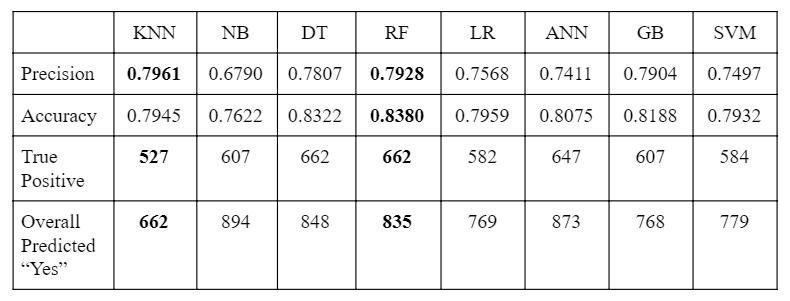

Overall, KNN shows the highest precision value (0.7961). However, only 662 of customers are predicted to subscribe the term deposit, and 527 customers from total 662 have subscribed, which shows the lowest true positive value among the models. Therefore, KNN is not a suitable classifier for term deposit prediction.


The second highest precision is Random Forest (0.7928). Based on the overall predicted “Yes” result (835), there are 662 customers predicted correctly to subscribe the term deposit. It shows the highest ratio between true positive and total predicted “Yes” when compared to other classifiers. Besides, it also achieved the highest accuracy (0.8380) and PR AUC (0.842). Therefore, Random Forest is the best model for the prediction of the term deposit subscription.


# 6.0 Deployment
 The project is deployed in the Google Colab, Kaggle and Github platforms.

 [Github Link](https://github.com/yujune/Data-Science)

# 7.0 Conclusion

The advantage of this trained model is to provide an accurate prediction and high precision result. In other words, during the prediction of the term deposit subscription using the model, there will be least differences between the actual and predicted results. Hence, the marketing team can target those customers that are predicted as potential subscribers by the model, which will save their marketing budget.


Although the Random Forest shows the best performance among the models, its precision value and accuracy value are lower than 90%. This is because of the insufficient and imbalanced dataset to train the model. Besides, based on the learning curve in the previous section, Random Forest also shows overfitting due to insufficient dataset as well. Therefore, it does not perform well in predicting the term deposit subscription.


In future, several enhancements can be made to improve the model performance such as increasing the number of dataset for training the classifier. This is because preparing enough datasets will prevent the overfitting in the model besides maximizing the precision and accuracy. 
